Difference from neid_fiesta_daily.ipynb:
Weightd average in the uncertainties 

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *
from NEID_solar_functions import *
from functions import *
#----------------------------------
# Read data
#----------------------------------


In [2]:
if 1:
    v_grid  = np.loadtxt('../lib/data_v4/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_v4/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_v4/σCCF.txt')
    bjd     = np.loadtxt('../lib/data_v4/bjd.txt')
    rv      = np.loadtxt('../lib/data_v4/rv.txt')
    σrv     = np.loadtxt('../lib/data_v4/σrv.txt')
    idx_rej = np.array(np.loadtxt('../lib/data_v4/idx_rej'), dtype=bool)
    
    # idx_v = (v_grid>90.25) & (v_grid<107.5)
    # v_grid = v_grid[idx_v]
    
    CCF = CCF[:,~idx_rej]
    σCCF = σCCF[:,~idx_rej]
    # CCF = CCF[idx_v,:]
    # σCCF = σCCF[idx_v,:]    
    bjd = bjd[~idx_rej]
    rv = rv[~idx_rej]
    σrv = σrv[~idx_rej]

In [3]:
max(v_grid), min(v_grid)

(107.25, 90.5)

In [4]:
if 0:
    v_grid  = np.loadtxt('../lib/data_526_625/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_526_625/CCF.txt')
    σCCF   = np.loadtxt('../lib/data_526_625/σ_CCF.txt')
    bjd     = np.loadtxt('../lib/data_526_625/bjd.txt')
    rv      = np.loadtxt('../lib/data_526_625/rv.txt')
    σrv     = np.loadtxt('../lib/data_526_625/σrv.txt')

    idx_t = (bjd<2459392) & (bjd>2459361)

    CCF = CCF[idx_v,idx_t]
    σCCF = σCCF[idx_v,idx_t]
    bjd = bjd[idx_t]
    rv = rv[idx_t]
    σrv = σrv[idx_t]


In [5]:
σCCF.shape, CCF.shape, v_grid.shape

((68, 31145), (68, 31145), (68,))

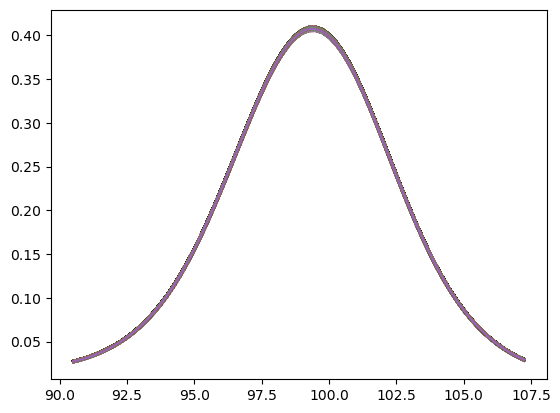

In [6]:
plt.plot(v_grid, CCF)
plt.show()

In [7]:
# plt.plot(v_grid, (CCF.T-np.mean(CCF,axis=1)).T)
# plt.show()

Daily averages

<ErrorbarContainer object of 3 artists>

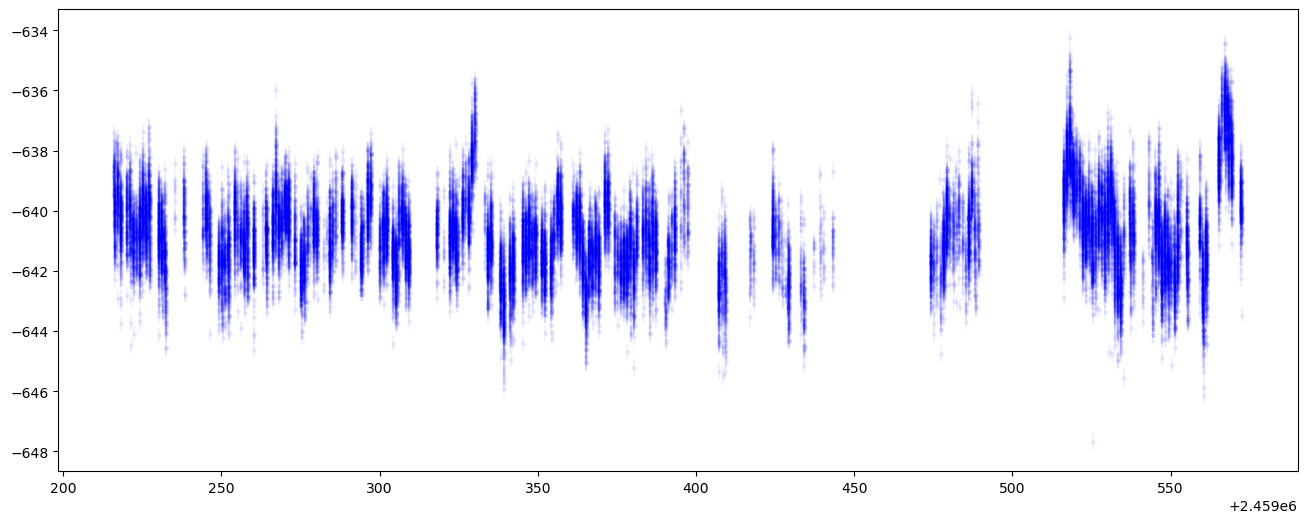

In [8]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd, rv, σrv, marker='.', ms=5, color='blue', ls='none', alpha=0.05)

In [9]:
t_min = int(min(bjd))
t_max = int(max(bjd))
N = t_max -t_min + 1

bjd_daily 			= np.zeros(N)
CCF_daily 			= np.zeros((len(v_grid), N))
σCCF_daily			= np.zeros((len(v_grid), N))
rv_daily			= np.zeros(N)
# rv_raw_daily		= np.zeros(N)
σrv_daily			= np.zeros(N)

for n in range(N):
    idx = (bjd>(t_min+n)) & (bjd<(t_min+n+0.5))
    if len(bjd[idx])!=0:
        bjd_daily[n] = weighted_avg_1D(bjd[idx], 1/σrv[idx]**2)
        rv_daily[n] =  weighted_avg_1D(rv[idx], 1/σrv[idx]**2)
        σrv_daily[n] = 1/np.sqrt(np.sum(1/σrv[idx]**2))
        CCF_daily[:,n] = 1-weighted_avg_2D(1-CCF[:,idx], 1/σrv[idx]**2)
        σCCF_daily[:,n] = 1/np.sqrt(np.sum(1/σCCF[:,idx]**2, axis=1))

In [11]:
idx_0 		= (rv_daily==0)
rv_daily 	= rv_daily[~idx_0]
# rv_raw_daily= rv_raw_daily[~idx_0]
σrv_daily 	= σrv_daily[~idx_0]
bjd_daily 	= bjd_daily[~idx_0]
CCF_daily 	= CCF_daily[:,~idx_0]
σCCF_daily 	= σCCF_daily[:,~idx_0]

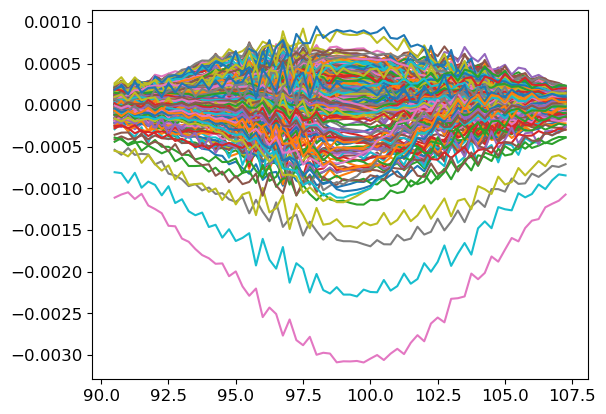

In [25]:
plt.plot(v_grid, (CCF_daily.T-np.mean(CCF_daily,axis=1)).T)
plt.show()

(-645.8110199849247, -635.8110199849247)

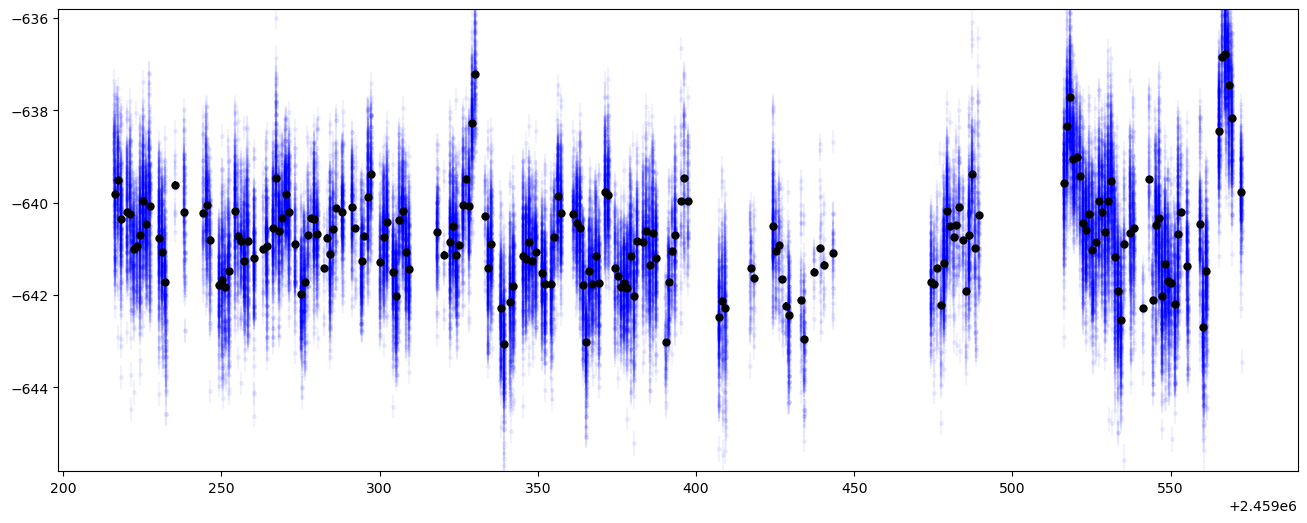

In [12]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd, rv, σrv, marker='.', ms=5, color='blue', ls='none', alpha=0.05)
plt.errorbar(bjd_daily, rv_daily, σrv_daily, marker='.', ms=10, color='black', ls='none')
plt.ylim([np.median(rv)-5, np.median(rv)+5])


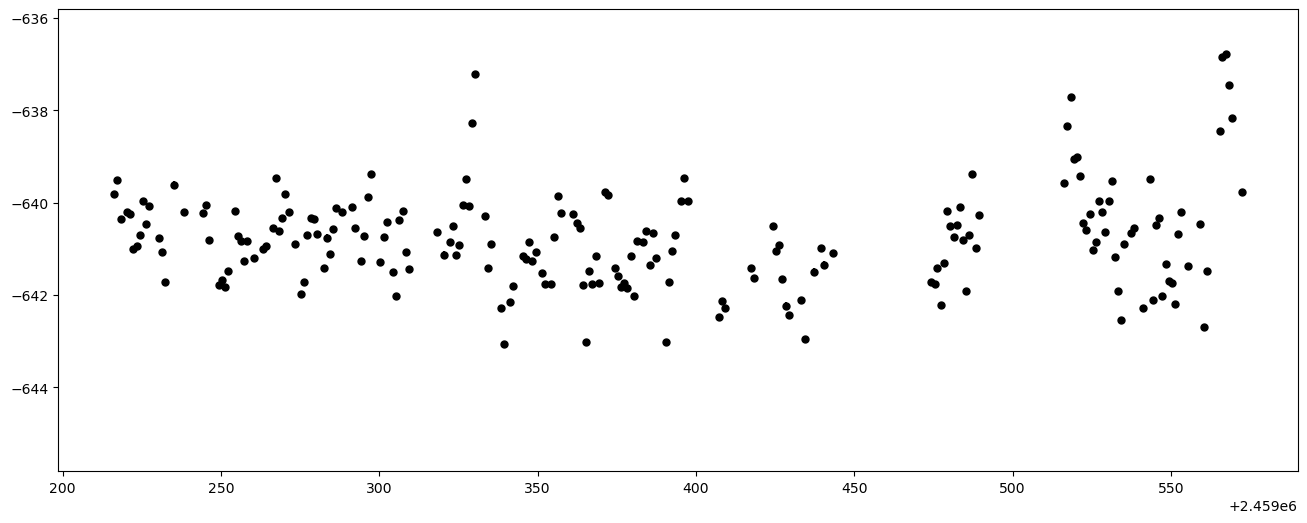

In [13]:
fig = plt.figure(figsize=(16, 6))
plt.errorbar(bjd_daily, rv_daily, σrv_daily, marker='.', ms=10, color='black', ls='none')
plt.ylim([np.median(rv)-5, np.median(rv)+5])
plt.show()

## FIESTA on daily CCF analysis

In [14]:
k_max = 55
df, RV_FT_k, eRV_FT_k, A_k, eA_k, RV_gauss = FIESTA(v_grid, CCF_daily, σCCF_daily, k_max=k_max)

RV_FT_k  *= 1000
eRV_FT_k *= 1000
RV_gauss *= 1000
ΔRV_k     = RV_FT_k - RV_gauss



Velocity grid used [90.50, 107.25]

ξ_normal = 2.00


The median SNR of all CCFs is 72735
ξ_modelling_noise = 1.94


Based on the user-defined SNR = 2.0:
ξ_individual = 2.00
ξ_timeseries = 1.71

In summary, the cut-off frequency for FIESTA is recommended to be 1.71 (29 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000        210229.2     376.7       0.0          0.13231   
1   0.059        101504.1     104.2      38.8          0.02100   
2   0.118         16117.4      39.0      13.1          0.00317   
3   0.176          2345.9      10.9       7.1          0.00098   
4   0.235           553.1       4.6       5.6          0.00067   
5   0.294           335.4       3.5       4.6          0.00051   
6   0.353           244.9       3.1       3.9          0.00040   
7   0.412           181.7       2.8       3.2          0.00033   
8   0.471           142.4       2.5       3.1          0.00027   
9   0.529           112.9       2.2       2.6      

## Plots 

In [16]:
k_max

34

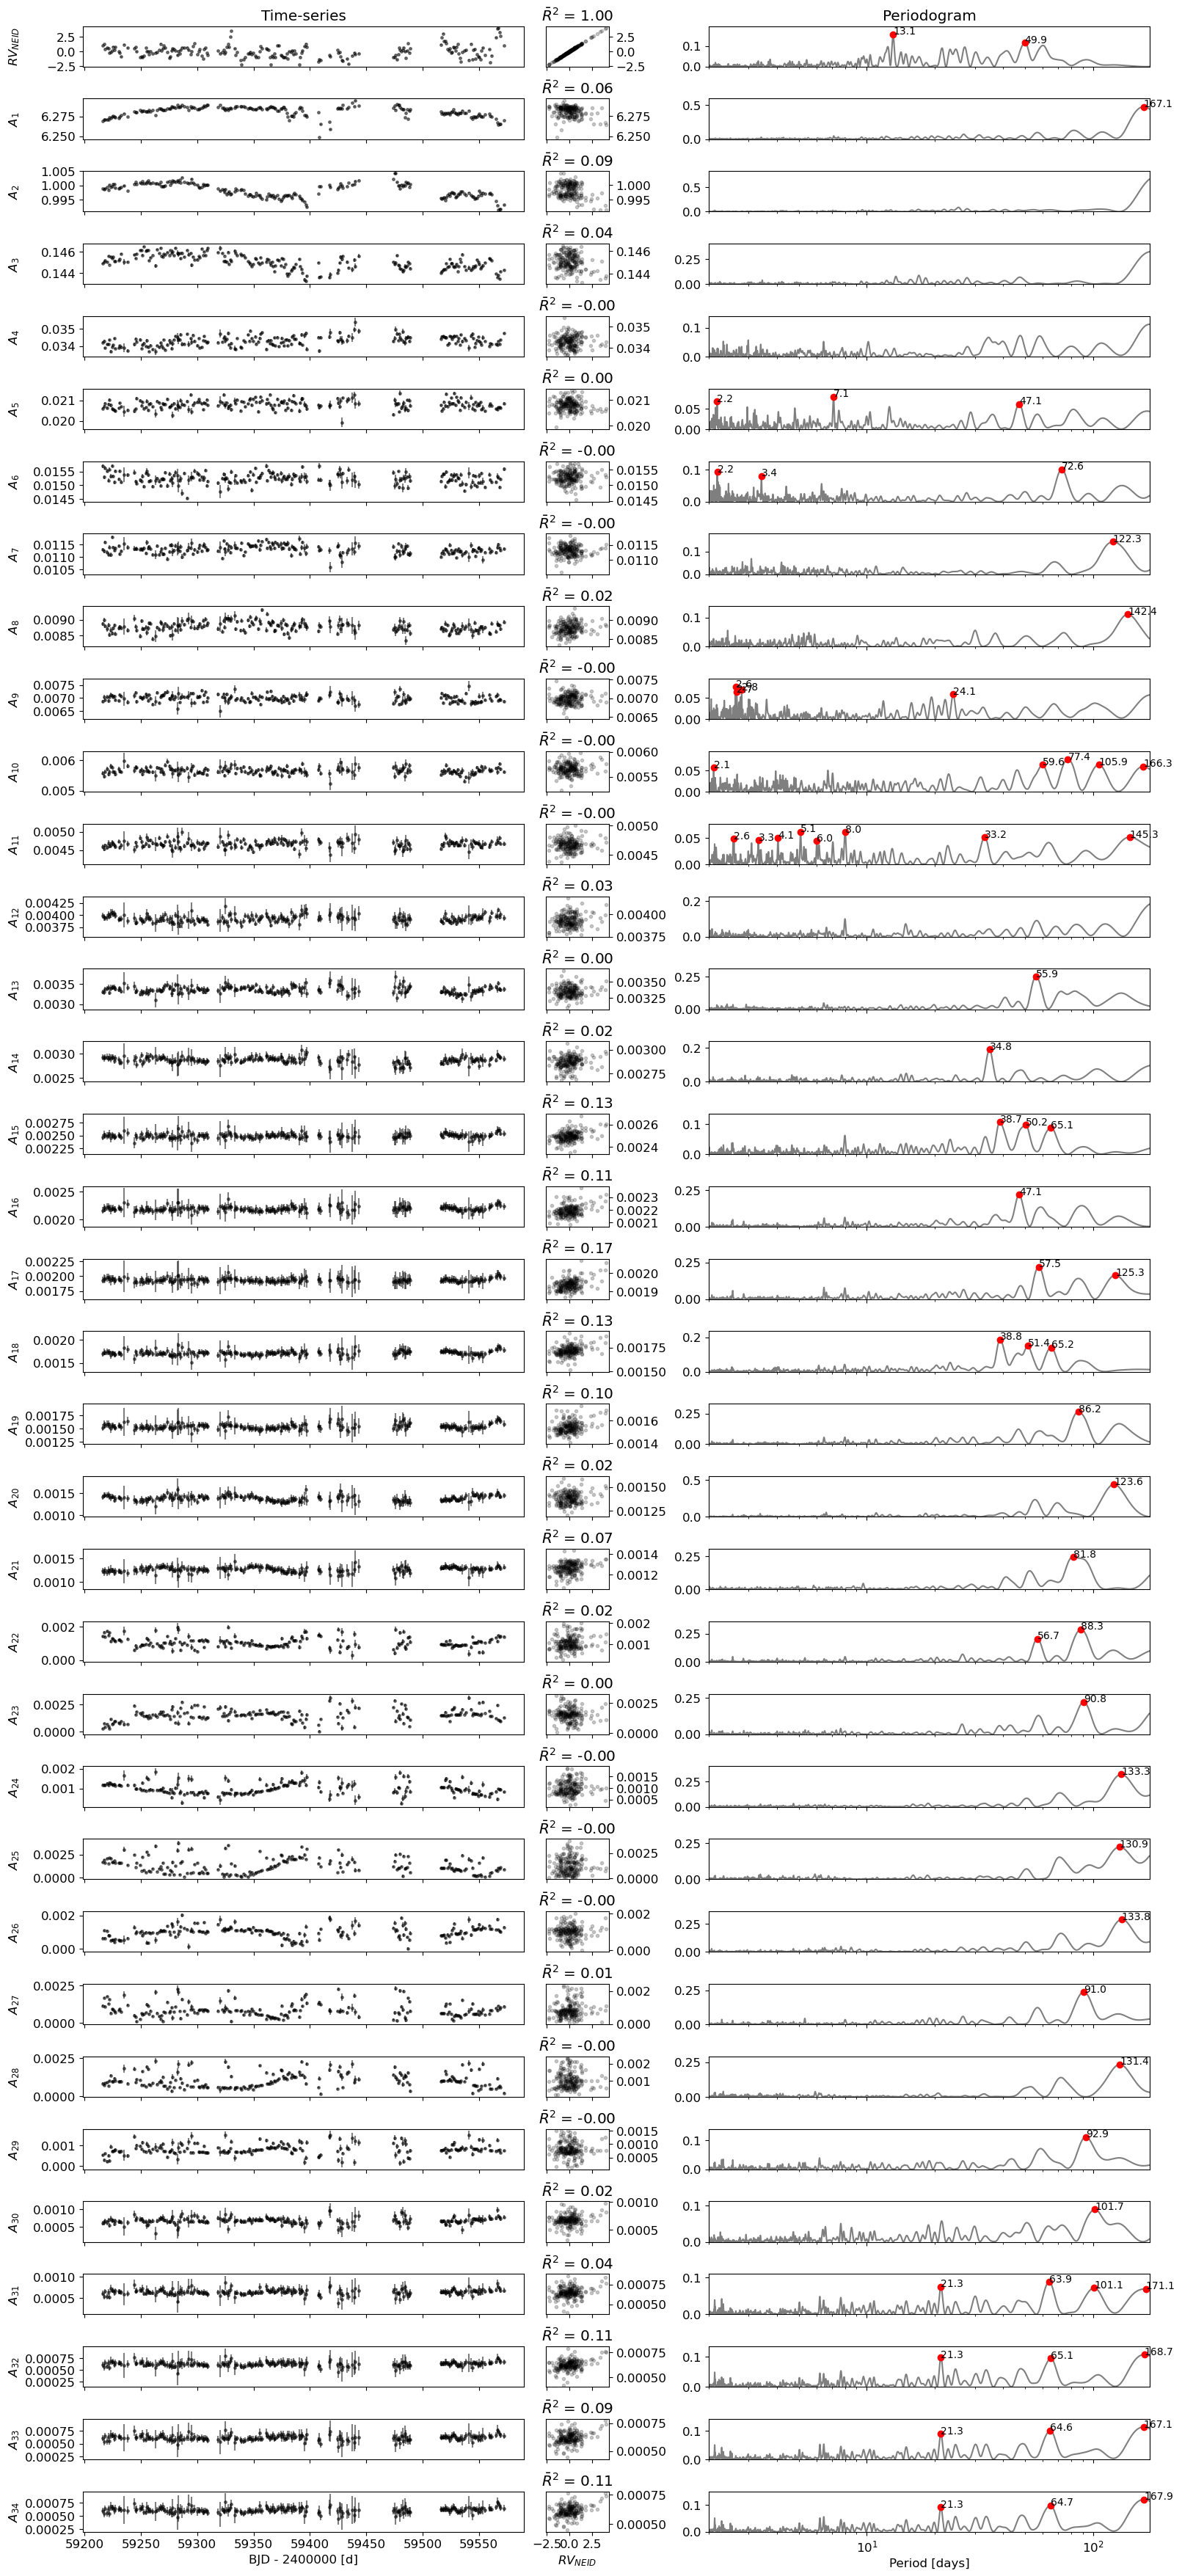

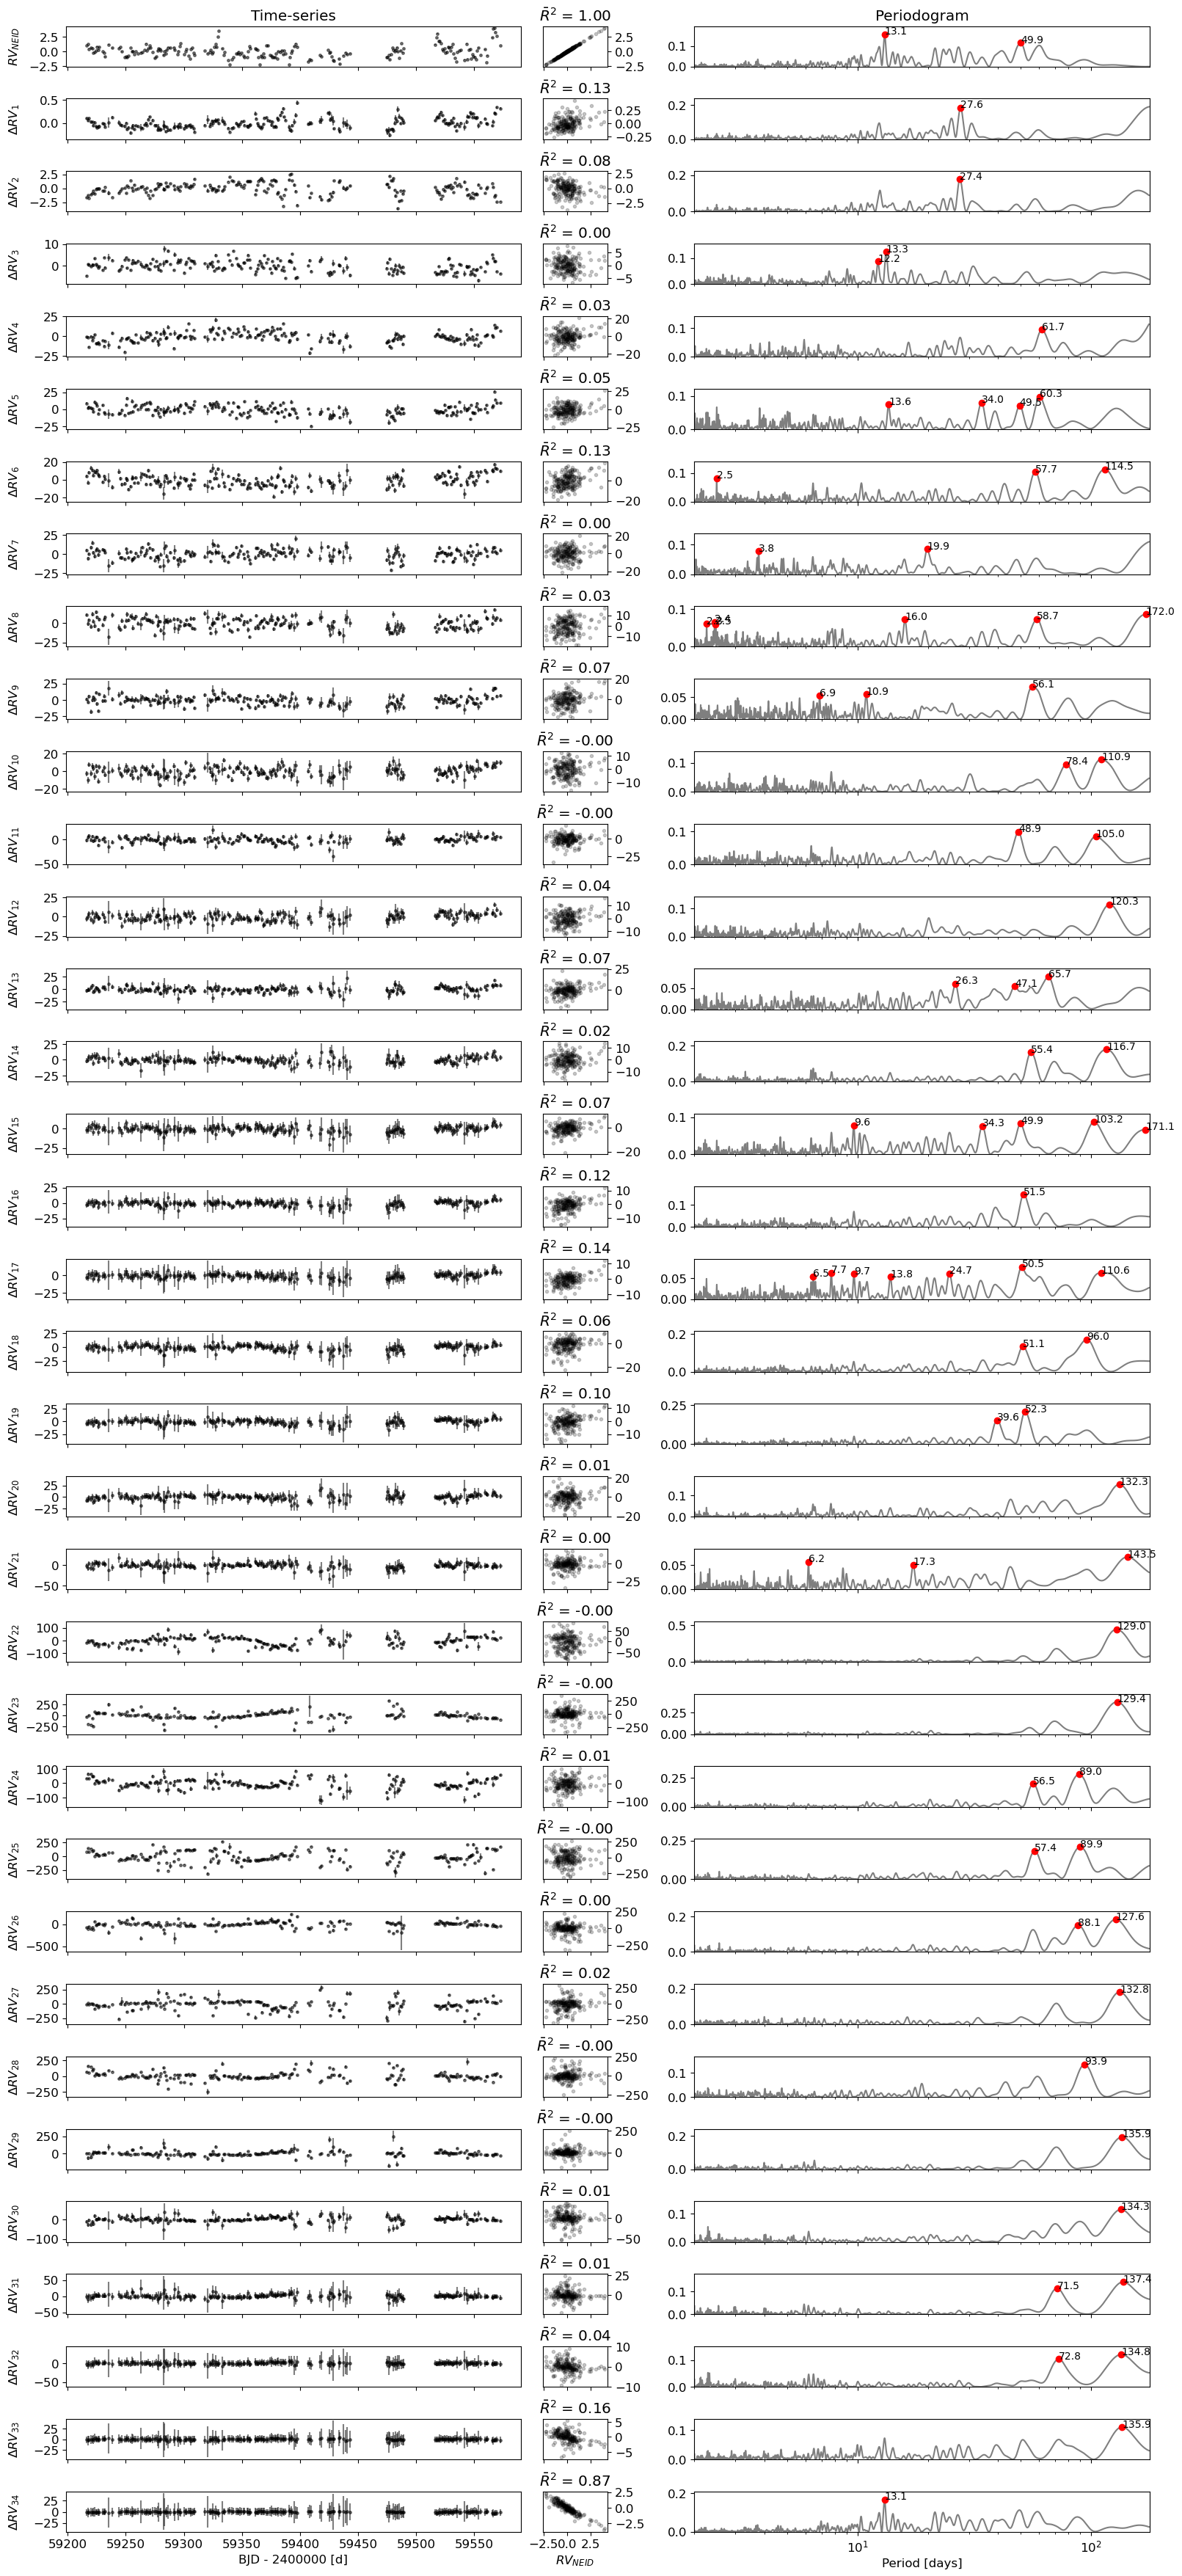

In [19]:
k_max = A_k.shape[0]

plot_all(k_mode=k_max, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=A_k, eind=eA_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='')
plt.show()

plot_all(k_mode=k_max, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=ΔRV_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='')
plt.show()

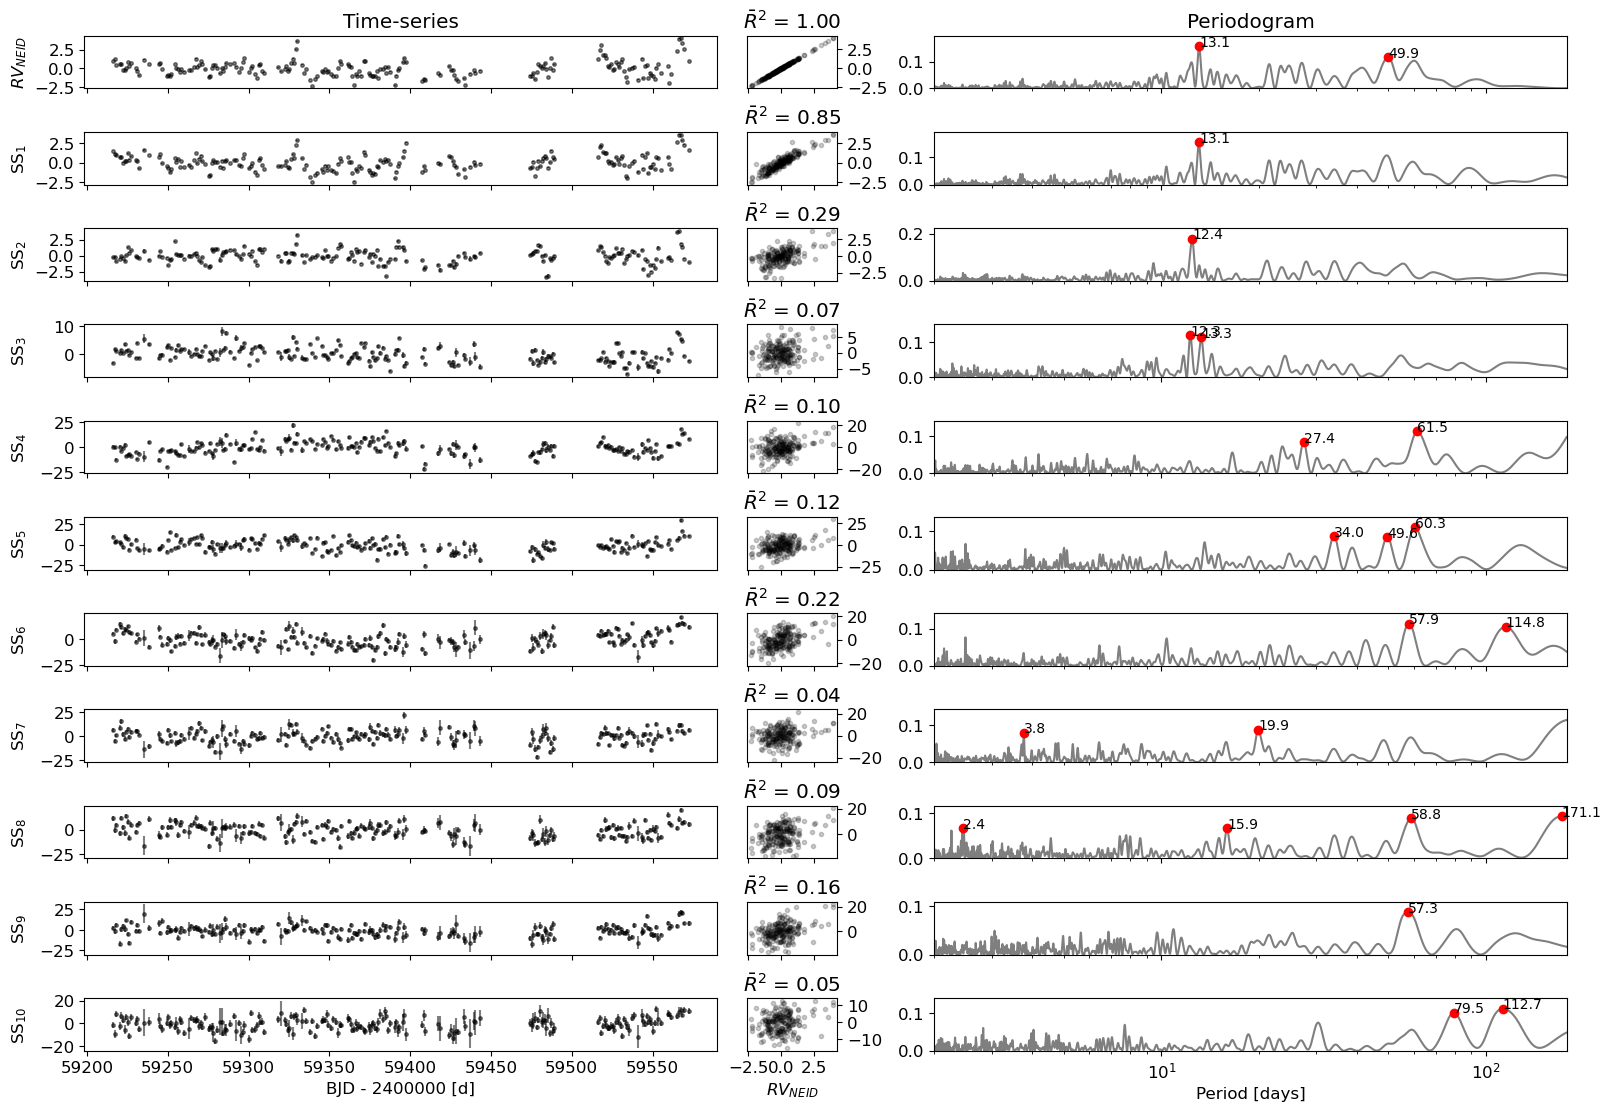

In [20]:
plot_all(k_mode=10, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=RV_FT_k, eind=eRV_FT_k, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='SS',
    file_name='')
plt.show()

# PCA

In [34]:
k_max = 34
PC, weighted_pca_score, err_weighted_pca_score, n_pca = weighted_pca(X=ΔRV_k[:k_max,:].T, X_err=eRV_FT_k[:k_max,:].T, nor=False)

Cumulative variance explained vs PCA components
1 	 59.671
2 	 97.945
3 	 101.804
4 	 102.938
5 	 103.404
6 	 103.675
7 	 103.912
8 	 104.120
9 	 104.317
10 	 104.497
11 	 104.628
12 	 104.741
13 	 104.839
14 	 104.916
15 	 104.979
16 	 105.030
17 	 105.059
18 	 105.086
19 	 105.103
20 	 105.119
21 	 105.127
22 	 105.133
23 	 105.137
24 	 105.140
25 	 105.142
26 	 105.144
27 	 105.145
28 	 105.145
29 	 105.145
30 	 105.145
31 	 105.115
32 	 105.025
33 	 104.135
34 	 100.000
2 pca scores account for 97.95% variance explained
Standard deviations of each component and the midean uncertainty are
 [132.4 111.9] 
 [8.7 8.9]


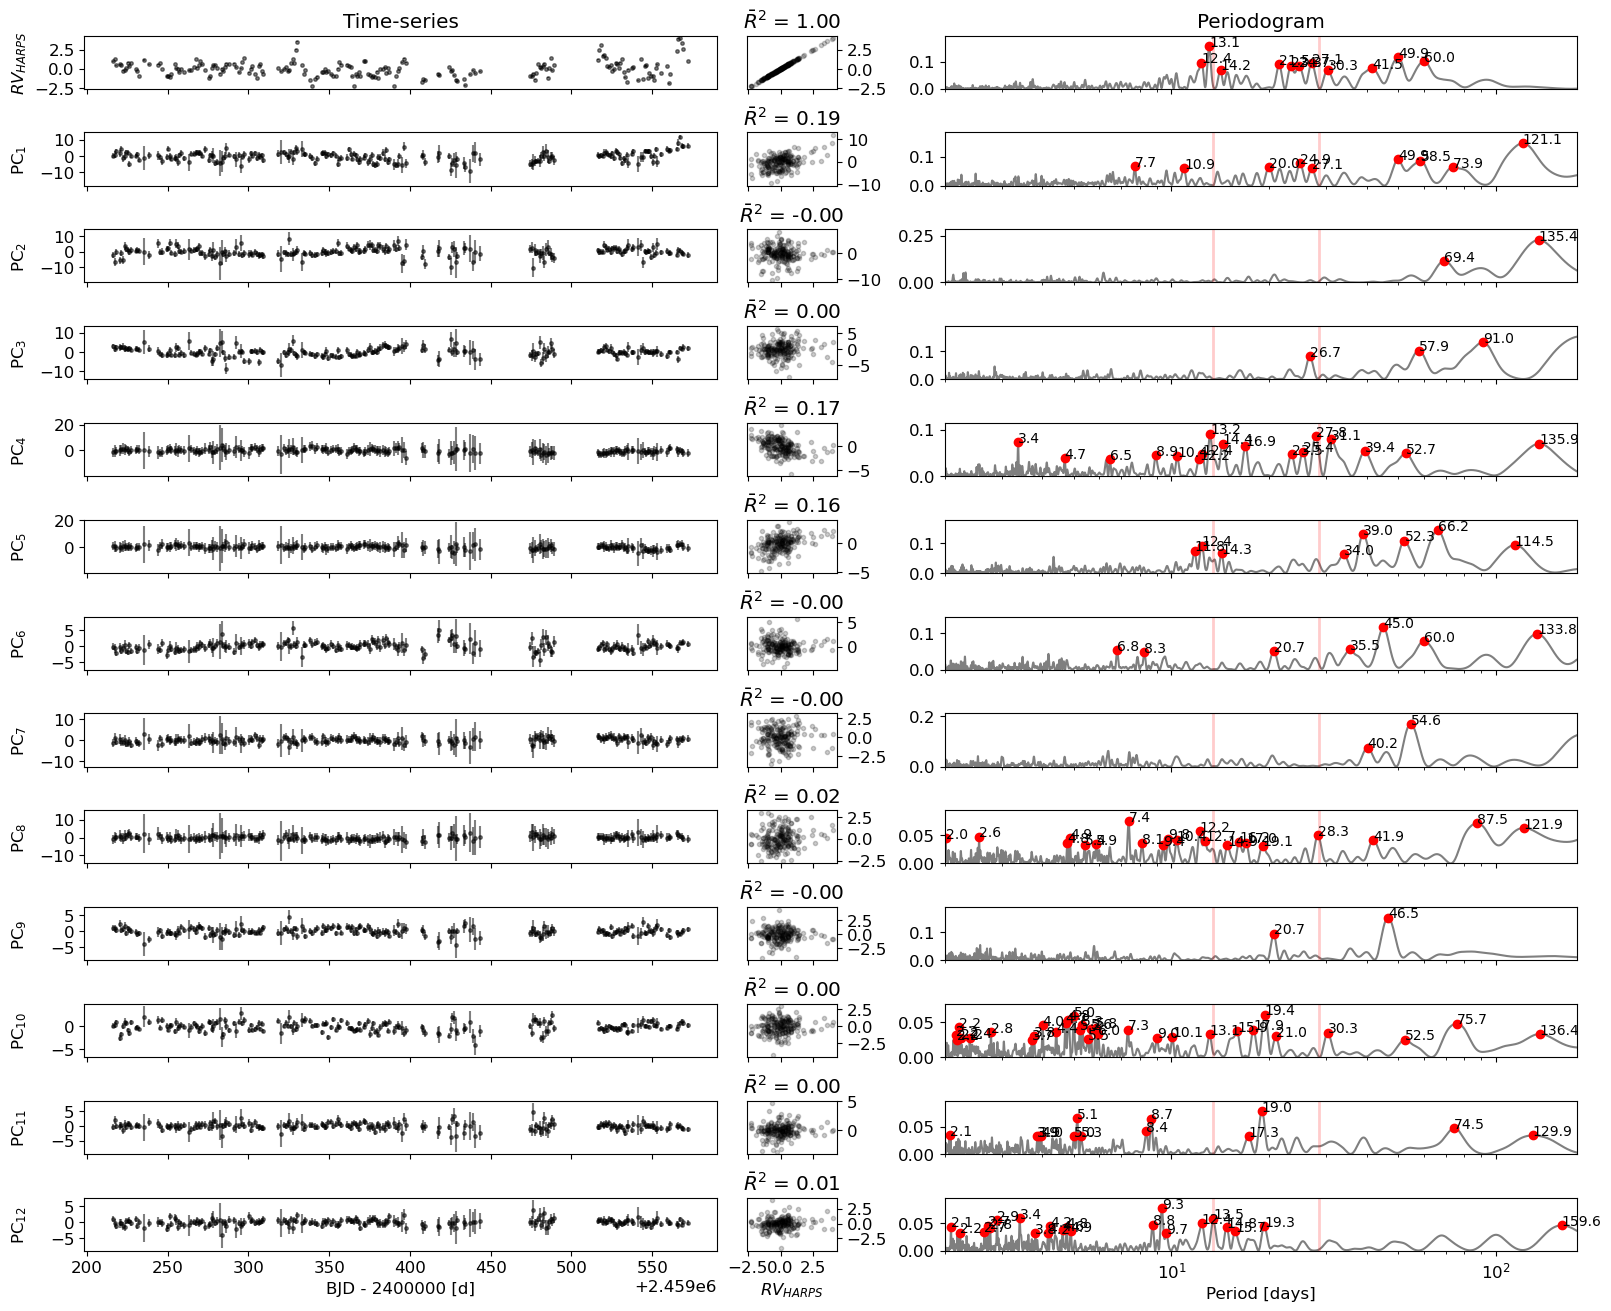

In [33]:
plot_all(k_mode=2, t=bjd_daily, rv=rv_daily, erv=σrv_daily, 
    vlines = [13.4, 28.5, 365/2, 285, 400],
    ind=weighted_pca_score.T, eind=err_weighted_pca_score.T, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{HARPS}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='PC',
    height_ratio=0.4,
    file_name='../Figures/PCA_delta_RV_k_max={:d}.pdf'.format(k_max))

### Multiple-linear regression

In [ ]:
shift_function_daily.shape

In [ ]:
feature_matrix = shift_function_daily[0:6,:].T
y_hat1, w_std_all, w_rms1, score1, df1 = mlr(feature_matrix, target_vector=rv_daily, etarget_vector=σrv_daily, lag='False')

#### Does MLR really work? - Data Scrambling

In [ ]:
# np.random.shuffle(arr)
idx_arr = np.arange(len(rv_daily))
np.random.shuffle(idx_arr)
idx_arr
feature_matrix = shift_function_daily[0:6,idx_arr].T
y_hat1, w_std_all, w_rms1, score1, df1 = mlr(feature_matrix, target_vector=rv_daily, etarget_vector=σrv_daily, lag='False')

#### Try activity indicators

In [ ]:
np.array(df_ind).shape

In [ ]:
if 0:
    plot_all(k_mode=6, t=np.array(df_daily['obs_date.mean_bjd'][idx_non0]), rv=np.array(df_daily['rv.drp.mean_rv'][idx_non0]), erv=σrv_daily, 
        ind=shift_function_daily, eind=err_shift_spectrum_daily, 
        ts_xlabel='BJD - 2400000 [d]', 
        rv_xlabel='$RV_{NEID}$', 
        pe_xlabel='Period [days]',
        ind_yalbel=r'$\Delta RV$',
        file_name=[])
    plt.show()

### amplitudes and $\Delta RV$

In [ ]:
T1      = pyasl.jdcnv(datetime(2021, 1, 1))
T2      = pyasl.jdcnv(datetime(2021, 5, 31))
idx_bjd = (bjd_daily>T1) & (bjd_daily<T2+1)

plt.rcParams.update({'font.size': 14})


plot_all(k_mode=10, t=bjd_daily[idx_bjd]-2400000, rv=rv_daily[idx_bjd], erv=σrv_daily[idx_bjd], 
    ind=power_spectrum_daily[idx_bjd], eind=err_power_spectrum_daily[idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name=[])
plt.show()

plot_all(k_mode=10, t=bjd_daily[idx_bjd]-2400000, rv=rv_daily[idx_bjd], erv=σrv_daily[idx_bjd], 
    ind=shift_function_daily[idx_bjd], eind=err_shift_spectrum_daily[idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name=[])
plt.show()

In [ ]:
power_spectrum_daily.shape

In [ ]:
plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_valid], rv=rv[idx_valid], erv=σrv[idx_valid], 
    ind=power_spectrum[:,idx_valid], eind=err_power_spectrum[:,idx_valid], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_2021.pdf')
plt.show()

plot_all(k_mode=6, t=bjd[idx_valid], rv=rv[idx_valid], erv=σrv[idx_valid],  
    ind=shift_function[:,idx_valid], eind=err_shift_spectrum[:,idx_valid], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_2021.pdf')
plt.show()

In [ ]:
x = bjd[idx_bjd]
y = rv[idx_bjd]
dy = σrv[idx_bjd]
height_ratio=0.4
plot_min_t=min(np.diff(bjd[idx_bjd]))
max_f= 1/max(np.diff(bjd[idx_bjd]))
spp=100
plot_min_t, max_f

In [ ]:
np.mean(np.diff(bjd[idx_bjd])*24*60)

In [ ]:
T1      = pyasl.jdcnv(datetime(2021, 6, 1))
T2      = pyasl.jdcnv(datetime(2021, 6, 1))
idx_bjd = (bjd>T1) & (bjd<T2+1)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0601.pdf')

plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0601.pdf')

In [ ]:
T1      = pyasl.jdcnv(datetime(2021, 4, 1))
T2      = pyasl.jdcnv(datetime(2021, 4, 1))
idx_bjd = (bjd>T1) & (bjd<T2+1)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0401.pdf')

plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0401.pdf')

In [ ]:
pwd